# Classification

In this assignment, you will be making and testing a k-Nearest Neighbors classification model.

## 1. Understanding the Data

We will be working with a data set built into Python called Iris. (For Python, we want to load the iris dataset by using sklearn's <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html">load_iris()</a> function.). Iris contains information on many different Iris flowers, including sepal length and width, petal length and width, and flower species. You can use the pictures below to help you better understand what the data is talking about.

Look at the following link for help with loading the Iris dataset and extracting data from it for plotting: http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html. 

### 1a. Make sure Jupyter allows you to display all the rows of Iris and then display the data set so you can see what is actually in it. Run the code to create a scatter plot of sepal width vs. sepal length and another scatterplot of petal width vs. petal length. 

In [48]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import pandas as pd
from sklearn.cross_validation import train_test_split

iris = datasets.load_iris()
print(iris.DESCR)

iris_df = pd.DataFrame(iris.data,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
print(iris_df)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

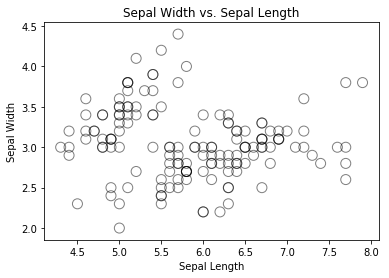

In [12]:
#Scatter plot for sepal width vs. sepal length
sepal_width = iris_df['Sepal Width']
sepal_length = iris_df['Sepal Length']

plt.scatter(sepal_length,sepal_width,s=100,facecolors='none',edgecolors='black',alpha=0.5)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Width vs. Sepal Length')

plt.show()

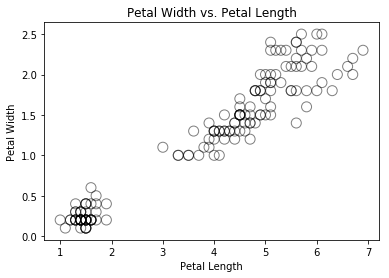

In [13]:
#Scatter plot for petal width vs. petal length
petal_width = iris_df['Petal Width']
petal_length = iris_df['Petal Length']

plt.scatter(petal_length,petal_width,s=100,facecolors='none',edgecolors='black',alpha=0.5)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Width vs. Petal Length')

plt.show()

## 2. Creating Training and Testing Sets
We want to be able to predict the species of a flower based on its petal and sepal width and length. To do this, we are going to divide the data into two sets- training and test.

In [15]:
print(iris.keys())

X = iris.data
Y = iris.target

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


## 3. Building the Model
Next, we are going to actually build the model using k-NN just like the classification tutorial. Use a k- value of 3.

In [45]:
from sklearn import neighbors
k3 = neighbors.KNeighborsClassifier(3,weights='distance')
k3.fit(X_train,Y_train)
k3_pred = k3.predict(X_test)
print(k3_pred)

(75,)
[1 0 2 2 0 2 1 2 0 1 0 2 1 0 2 2 0 1 0 0 0 2 2 0 0 1 0 1 1 1 2 0 2 0 1 1 2
 2 2 1 0 1 2 1 2 0 1 1 0 1 0 2 2 2 0 1 2 2 1 2 0 1 1 0 0 2 2 0 2 1 2 2 0 2
 0]


## 4. Testing the Model
Now, we want to see how well the model performed. To do this, we will compare the predicted result next to the actual species type.

In [47]:
#0 = setosa
#1 = versicolour
#2 = virginica

compare_df = pd.DataFrame(Y_test,columns=['Actual Types'])
compare_df['Predicted Types'] = k3_pred
print(compare_df.to_string(index=False))

Actual Types  Predicted Types
           1                1
           0                0
           2                2
           2                2
           0                0
           2                2
           2                1
           2                2
           0                0
           1                1
           0                0
           2                2
           1                1
           0                0
           2                2
           2                2
           0                0
           1                1
           0                0
           0                0
           0                0
           2                2
           2                2
           0                0
           0                0
           1                1
           0                0
           1                1
           1                1
           1                1
           2                2
           0                0
          

In [50]:
from sklearn.metrics import accuracy_score,recall_score,precision_score

#Overall accuracy
overall_accuracy = accuracy_score(Y_test,k3_pred)
print('Overall accuracy of the Classifier Predictions')
print(overall_accuracy)

#Average recall
average_recall = recall_score(Y_test,k3_pred,average='macro')
print('Average recall of the Classifier Predictions')
print(average_recall)

#Average precision
average_prec = precision_score(Y_test,k3_pred,average='macro')
print('Average precision of the Classifier Predictions')
print(average_prec)

Overall accuracy of the Classifier Predictions
0.96
Average recall of the Classifier Predictions
0.958668813741
Average precision of the Classifier Predictions
0.961038961039
